In [1]:
import sys
import os

# Añade el directorio padre al sys.path
sys.path.append(os.path.abspath("/eos/home-d/dcostasr/SWAN_projects/2025_data"))
sys.path.append(os.path.abspath("/eos/home-d/dcostasr/SWAN_projects/NiCf/offline_trigger"))
sys.path.append('/eos/home-d/dcostasr/SWAN_projects/software/hipy')
sys.path.append("/eos/home-d/dcostasr/SWAN_projects/software/wcte_software/")

import hipy.pltext       as pltext
import hipy.utils        as ut
import matplotlib.pyplot as plt
import awkward           as ak
import numpy             as np
import matplotlib.colors as colors

from src.read_data                   import load_concatenated, read_parquet, nHits
from tqdm.notebook                   import tqdm
from WCTE_event_display.EventDisplay import EventDisplay
from scipy.special import factorial


%load_ext autoreload
%autoreload 2

pltext.style()

In [2]:
# ============= LOADS THE DATA ===================
run  = 1770
data = load_concatenated(outdir=f"/eos/home-d/dcostasr/SWAN_projects/NiCf/offline_trigger/tmp_parquet/{run}")

In [3]:
# =============== MASK OUT CARDS 130-132 ===================
run_cards, run_channels, run_slots, run_positions, run_times, run_events, run_charges, run_window_times = read_parquet(data, mask=True)

In [4]:
run_times = ak.sort(run_times)

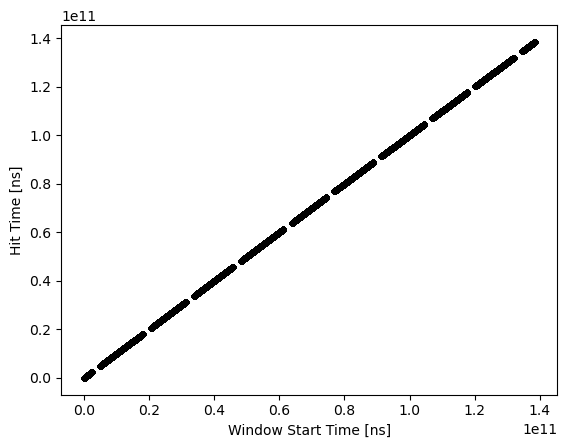

In [5]:
plt.scatter(ak.ravel(run_window_times)[::10], ak.ravel(run_times)[::10], marker=".");
plt.ylabel("Hit Time [ns]");
plt.xlabel("Window Start Time [ns]");
# plt.xlim(1.75e10, 2.15e10);
# plt.ylim(0, 0.4e11);

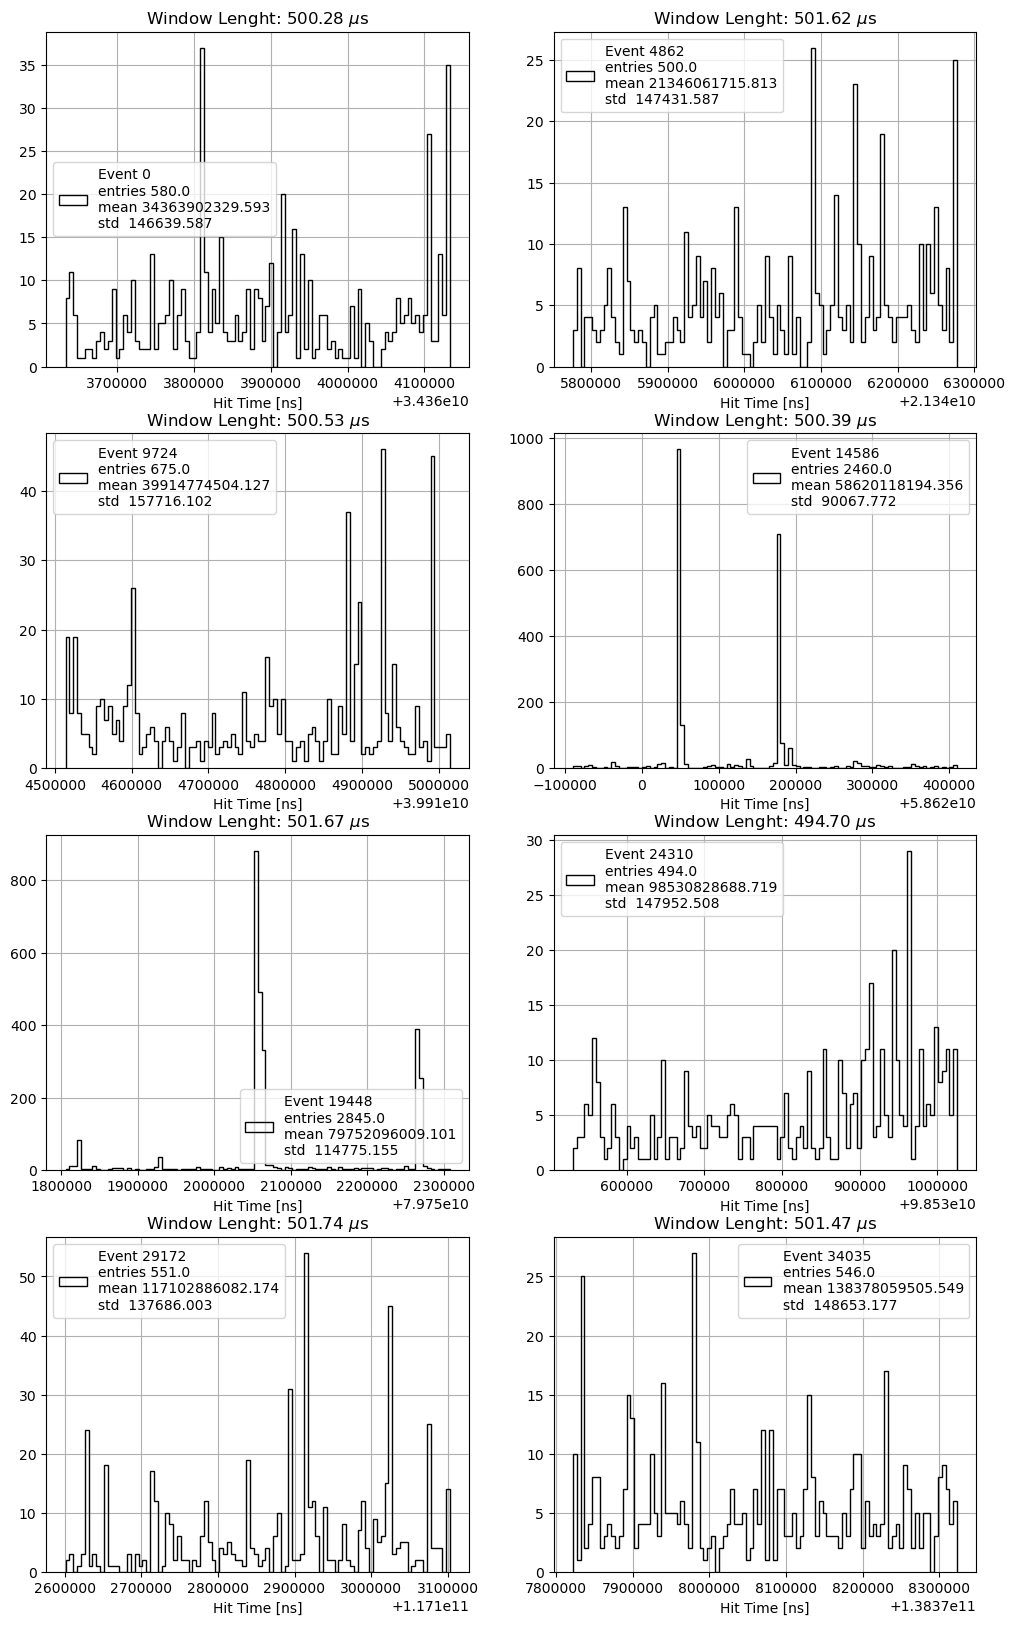

In [6]:
subplot = pltext.canvas(8)

for i, event in enumerate(np.linspace(0, len(run_times)-1, 8).astype(int)):
    
    subplot(i+1)
    pltext.hist(run_times[event], 100, xylabels="Hit Time [ns]", label=f"Event {event}");
    plt.title(f"Window Lenght: {(run_times[event][-1] - run_times[event][0])/1e3:.2f} $\mu$s");

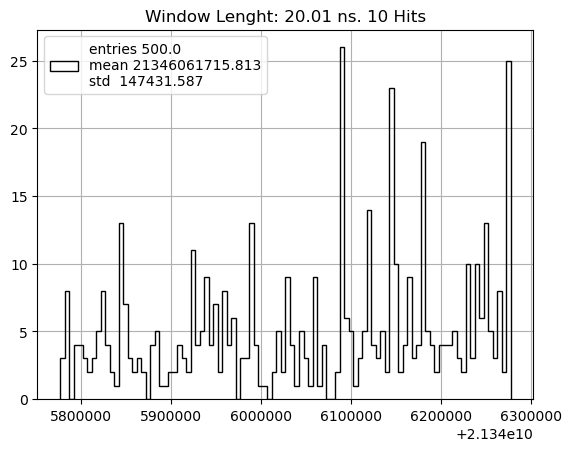

In [7]:
data = run_times[4862]
hist_range=(data[236], data[236]+100)
indices_in_range = np.where((data >= hist_range[0]) & (data <= hist_range[1]))[0]

pltext.hist(data, 100, range=None);
plt.title(f"Window Lenght: {data[indices_in_range][-1] - data[indices_in_range][0]:.2f} ns. {len(data[indices_in_range])} Hits");

In [8]:
from matplotlib.backends.backend_pdf import PdfPages

data = run_times[4862]

with PdfPages("./plots_salida.pdf") as pdf:
    for i in tqdm(range(len(data)), total=len(data)):
        hist_range=(data[i], data[i]+100)
        indices_in_range = np.where((data >= hist_range[0]) & (data <= hist_range[1]))[0]

        pltext.hist(data, 100, range=hist_range);
        plt.title(f"Window Lenght: {data[indices_in_range][-1] - data[indices_in_range][0]:.2f} ns. {len(data[indices_in_range])} Hits");

        pdf.savefig()  
        plt.close()    

  0%|          | 0/500 [00:00<?, ?it/s]

# Event Display

(2014,)


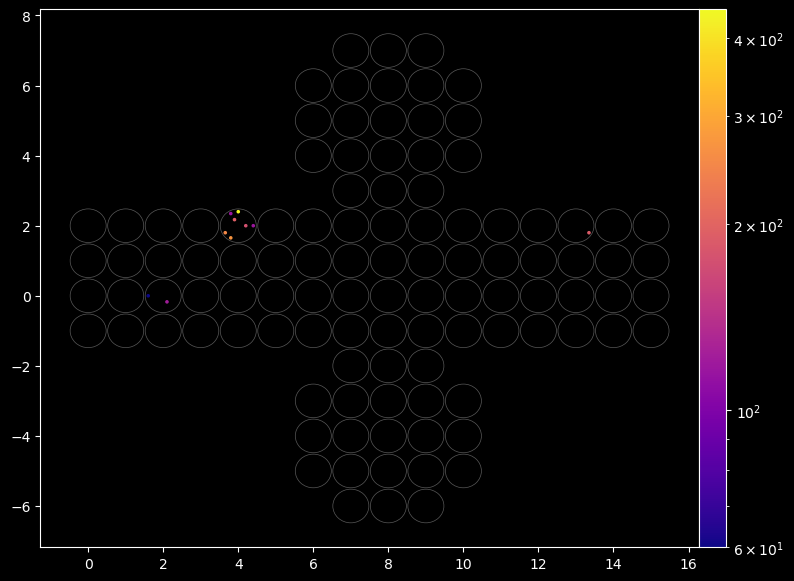

In [ ]:
event = 0
pmt_id = (run_slots[event]*19 + run_positions[event])
data_to_plot = run_charges[event][indices_in_range]

eventDisplay = EventDisplay() 
eventDisplay.load_mPMT_positions('mPMT_2D_projection_angles.csv')

ev_disp_data = eventDisplay.process_data(pmt_id, data_to_plot, sum_data=False)
eventDisplay.plotEventDisplay(ev_disp_data, color_norm=colors.LogNorm(), style="dark_background", fig_width=10)

plt.show(block=False)
plt.style.use('default');

pltext.style()

### nHits

In [11]:
event = 0
triggered_hits_index = nHits(mode="single_event", hit_times=run_times, event=event, w=50, thresh_min=4, thresh_max=50, pre_window=50, post_window=50, jump=100)

In [12]:
triggered_hits_index

{0: [array([85, 86, 87, 88, 89]),
  array([159, 160, 161, 162, 163, 164, 165, 166, 167]),
  array([169, 170, 171, 172, 173, 174, 175, 176, 177, 178]),
  array([182, 183, 184, 185, 186, 187, 188]),
  array([190, 191, 192, 193, 194, 195, 196, 197]),
  array([316, 317, 318, 319]),
  array([351, 352, 353, 354]),
  array([363, 364, 365, 366, 367, 368]),
  array([502, 503, 504, 505, 506, 507, 508, 509, 510]),
  array([515, 516, 517, 518, 519]),
  array([528, 529, 530, 531]),
  array([550, 551, 552, 553, 554]),
  array([563, 564, 565, 566]),
  array([567, 568, 569, 570, 571, 572])]}

In [13]:
# Suponiendo que quieres procesar el valor asociado a la clave 4862
ranges = [f"{arr.min()}:{arr.max()+1}" for arr in triggered_hits_index.get(event)]
tuple_of_slices = tuple(slice(int(r.split(':')[0]), int(r.split(':')[1])) for r in ranges)
indices = np.r_[tuple_of_slices]

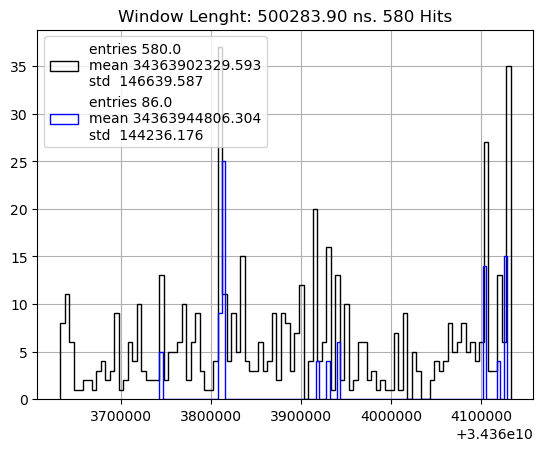

In [14]:
data = run_times[event]
hist_range=(data[0], data[-1])
indices_in_range = np.where((data >= hist_range[0]) & (data <= hist_range[1]))[0]

pltext.hist(data, 100);
pltext.hist(data[indices], 100);
plt.title(f"Window Lenght: {data[indices_in_range][-1] - data[indices_in_range][0]:.2f} ns. {len(data[indices_in_range])} Hits");

### Event Display

(2014,)


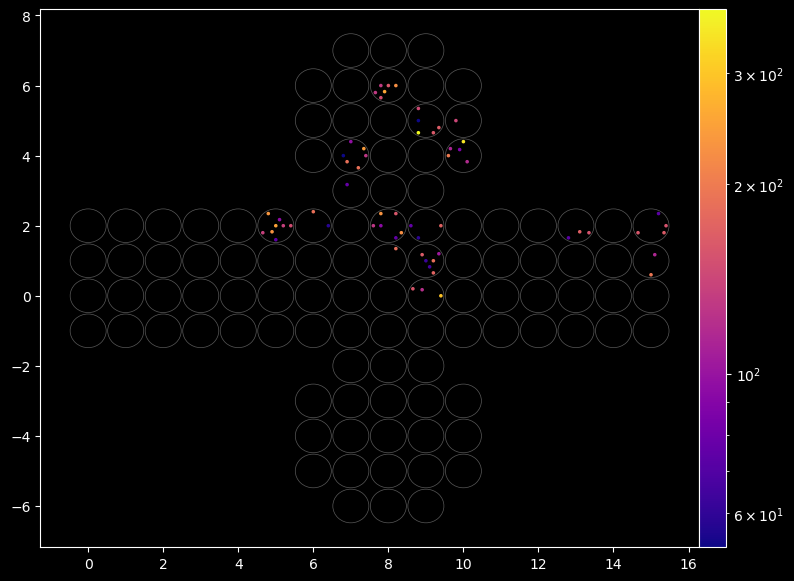

In [16]:
event = 0
pmt_id = (run_slots[event]*19 + run_positions[event])
data_to_plot = run_charges[event][indices]

eventDisplay = EventDisplay() 
eventDisplay.load_mPMT_positions('mPMT_2D_projection_angles.csv')

ev_disp_data = eventDisplay.process_data(pmt_id, data_to_plot, sum_data=False)
eventDisplay.plotEventDisplay(ev_disp_data, color_norm=colors.LogNorm(), style="dark_background", fig_width=10)

plt.show(block=False)
plt.style.use('default');

pltext.style()

# Bottom Position

In [25]:
# ============= LOADS THE DATA ===================
run  = 1771
data = load_concatenated(outdir=f"/eos/home-d/dcostasr/SWAN_projects/NiCf/offline_trigger/tmp_parquet/{run}")

In [26]:
# =============== MASK OUT CARDS 130-132 ===================
run_cards, run_channels, run_slots, run_positions, run_times, run_events, run_charges, run_window_times = read_parquet(data, mask=True)

In [27]:
run_times = ak.sort(run_times)

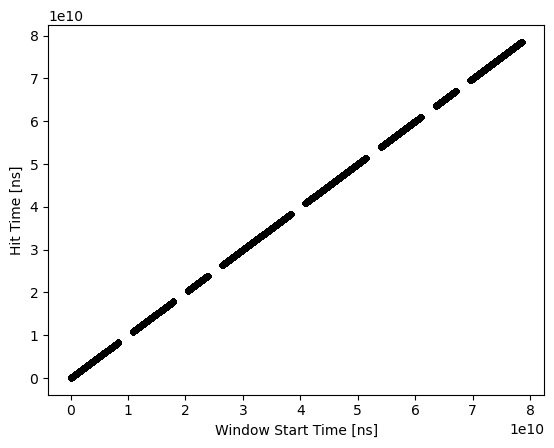

In [28]:
plt.scatter(ak.ravel(run_window_times)[::10], ak.ravel(run_times)[::10], marker=".");
plt.ylabel("Hit Time [ns]");
plt.xlabel("Window Start Time [ns]");
# plt.xlim(1.75e10, 2.15e10);
# plt.ylim(0, 0.4e11);

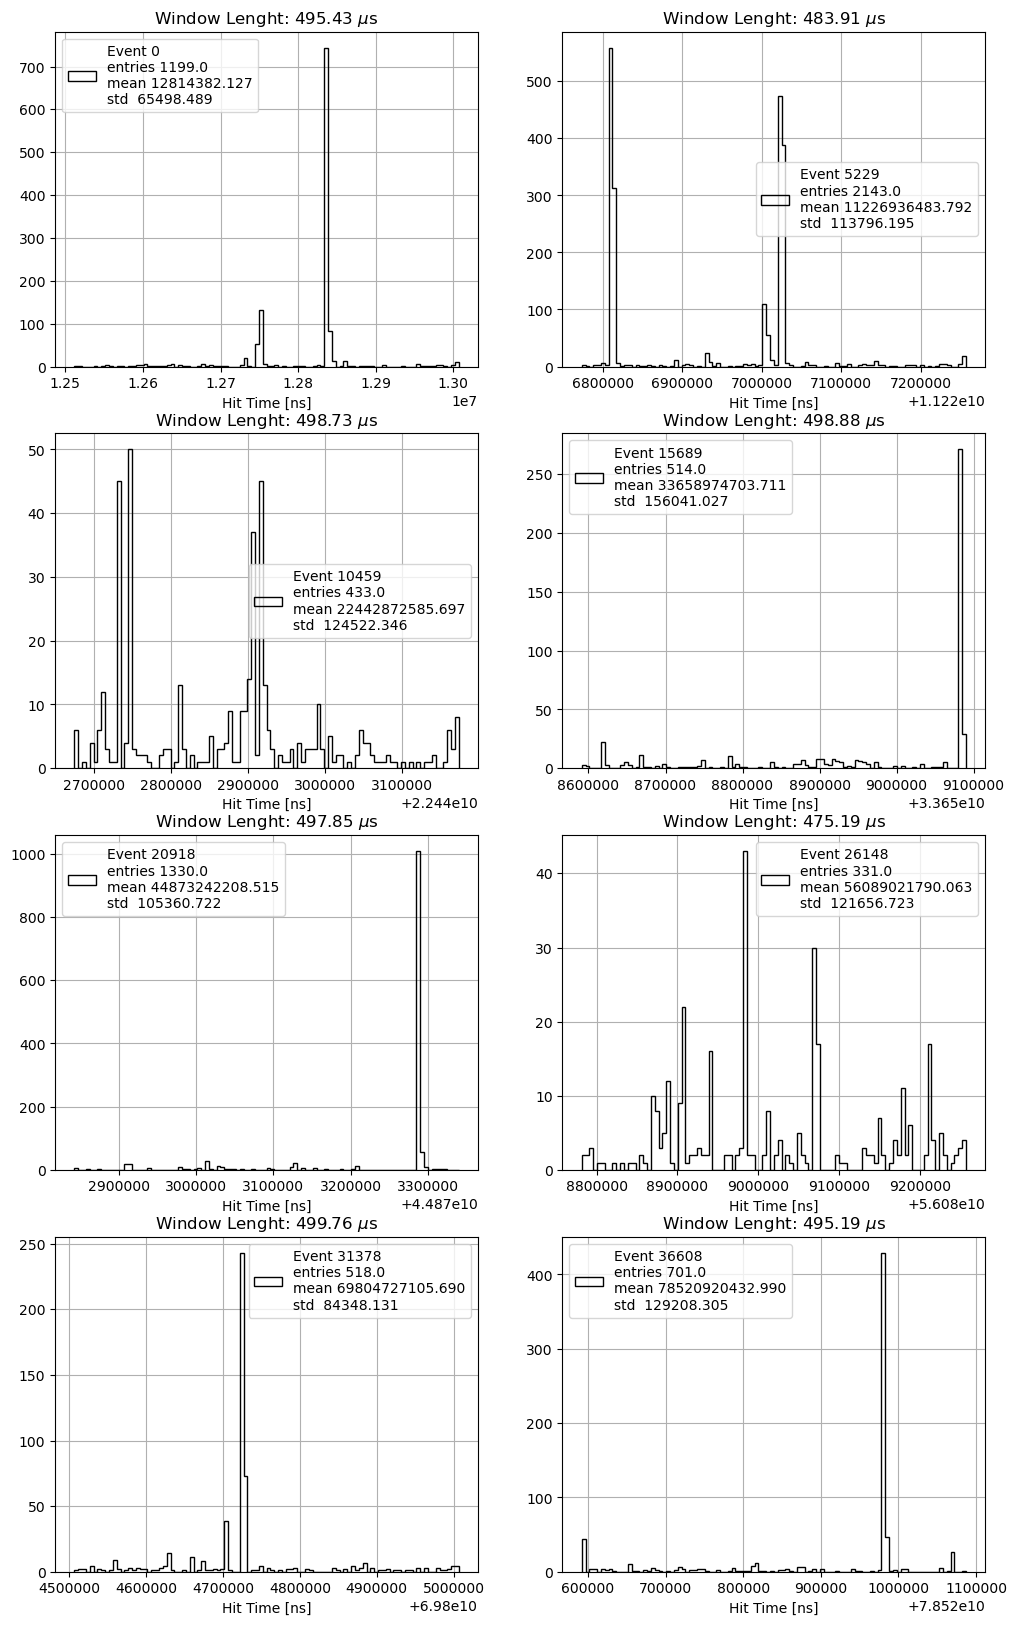

In [30]:
subplot = pltext.canvas(8)

for i, event in enumerate(np.linspace(0, len(run_times)-1, 8).astype(int)):
    
    subplot(i+1)
    pltext.hist(run_times[event], 100, xylabels="Hit Time [ns]", label=f"Event {event}");
    plt.title(f"Window Lenght: {(run_times[event][-1] - run_times[event][0])/1e3:.2f} $\mu$s");

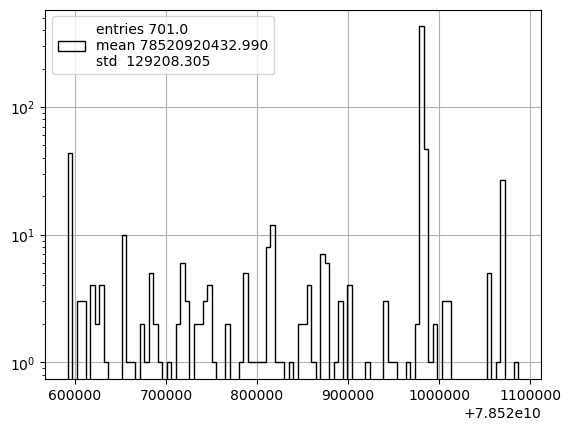

In [173]:
event = 36608
data = run_times[event]
hist_range=(4.487e10+3285e3, 4.487e10+3300e3)
indices_in_range = np.where((data >= hist_range[0]) & (data <= hist_range[1]))[0]

pltext.hist(data, 100, range=None, ylog=True);
# plt.title(f"Window Lenght: {data[indices_in_range][-1] - data[indices_in_range][0]:.2f} ns. {len(data[indices_in_range])} Hits");

### nHits

In [181]:
w=50
thresh_min=4
thresh_max=50
pre_window=100
post_window=250
jump= w + pre_window + post_window

triggered_hits_index = {}

ht = ak.to_numpy(run_times[event])

# Sliding window logic
ends   = ht + w
right  = np.searchsorted(ht, ends, side="left")
left   = np.arange(len(ht))
counts = right - left

# Get the indices of all the hit times that triggered the nHits algorithm
trigger_indices = np.where((counts >= thresh_min) & (counts < thresh_max))[0]
print("window: ", trigger_indices)

event_hits = []
last_trigger_time = -np.inf  # First trigger always need to exist

# Search for the rest of the hits in the trigger
for idx in trigger_indices:
    # Define actual sliding window that triggered
    i_start = idx
    i_end = right[idx]  # one past the last hit in window
    window_hits = ht[i_start:i_end]
    # print(f"Hits in Trigger Window: {len(window_hits)}")

    first_hit_time = window_hits[0]
    last_hit_time  = window_hits[-1]

    # Avoid overlap due to dead time
    if first_hit_time < last_trigger_time + jump:
        continue

    # Expand window
    t_min = first_hit_time - pre_window
    t_max = last_hit_time + post_window

    pre_indices = np.where((ht >= t_min))[0]
    post_indices = np.where((ht <= t_max))[0]
    buffer_indices = np.where((ht >= first_hit_time) & (ht <= last_hit_time))[0]
    
    tmp_only_in_post = np.setdiff1d(post_indices, buffer_indices)
    only_in_post = tmp_only_in_post[tmp_only_in_post > buffer_indices.max()]
    
    if len(only_in_post) >= thresh_min:
        continue
    
    print("pre: ", pre_indices)
    print("post: ", post_indices)
    print("buffer: ", buffer_indices)
    print("hits_from_post:", only_in_post)
    print(f"Hits in Window after Pre/Post Trigger window: {len(buffer_indices)}")
    event_hits.append(buffer_indices)
    
    last_trigger_time = first_hit_time  # or maybe last_hit_time 

# Update dictionary
if len(event_hits) > 0:
    triggered_hits_index[event] = event_hits

window:  [  1   2   3   7  25  26  30  31  32  33  34  63 123 124 128 182 183 184
 185 186 187 188 189 190 191 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 237 238 239 240 241 242 243 244 245 246 247
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333
 334 335 336 337 338 339 340 341 342 343 344 350 351 352 353 354 355 356
 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374
 375 376 377 378 379 380 381 382 383 384 385 392 393 394 395 396 397 398
 399 400 401 402 403 404 405 406 411 412 413 414 415 416 417 418 419 420
 424 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444
 445 446 447 448 449 450 451 452 453 454 4

In [175]:
triggered_hits_index

{36608: [array([ 7,  8,  9, 10]),
  array([30, 31, 32, 33, 34, 35, 36, 37]),
  array([63, 64, 65, 66]),
  array([128, 129, 130, 131]),
  array([324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336,
         337, 338, 339, 340, 341, 342, 343, 344, 345, 346]),
  array([557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569,
         570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582,
         583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595,
         596, 597, 598, 599, 600, 601, 602, 603, 604, 605]),
  array([621, 622, 623, 624]),
  array([684, 685, 686, 687, 688, 689])]}

In [176]:
# Suponiendo que quieres procesar el valor asociado a la clave 4862
ranges = [f"{arr.min()}:{arr.max()+1}" for arr in triggered_hits_index.get(event)]
tuple_of_slices = tuple(slice(int(r.split(':')[0]), int(r.split(':')[1])) for r in ranges)
indices = np.r_[tuple_of_slices]

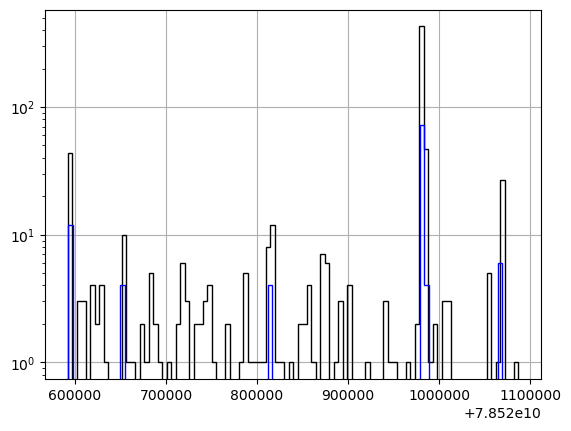

In [177]:
data = run_times[event]
hist_range=(6.98e10+4723e3, 6.98e10+4728e3)
indices_in_range = np.where((data >= hist_range[0]) & (data <= hist_range[1]))[0]
trigger_indices_in_range = np.where((data[indices] >= hist_range[0]) & (data[indices] <= hist_range[1]))[0]

pltext.hist(data, 100, ylog=True, range=None, stats=False);
pltext.hist(data[indices], 100, range=None, stats=False);
# plt.title(f"Window Lenght: {data[indices_in_range][-1] - data[indices_in_range][0]:.2f} ns. {len(data[indices_in_range])} Hits");

### Event Display

(2014,)


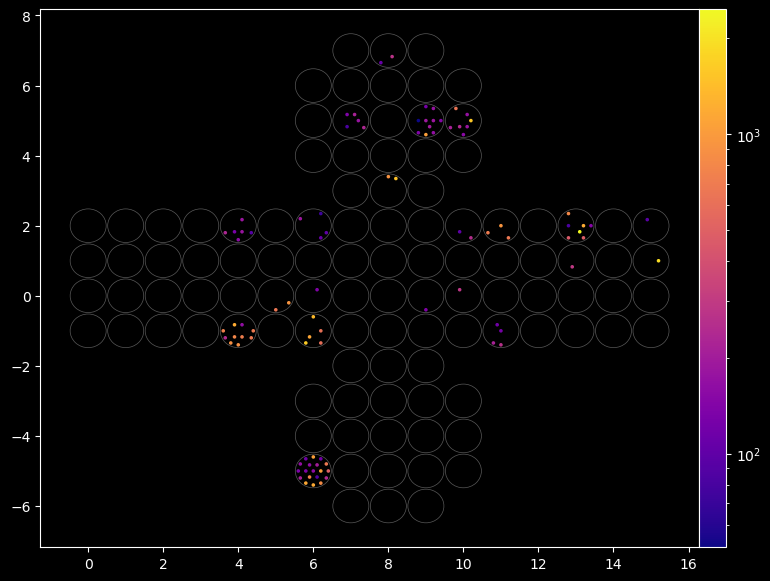

In [178]:
pmt_id = (run_slots[event]*19 + run_positions[event])
data_to_plot = run_charges[event][indices]
eventDisplay = EventDisplay() 
eventDisplay.load_mPMT_positions('mPMT_2D_projection_angles.csv')

ev_disp_data = eventDisplay.process_data(pmt_id, data_to_plot, sum_data=False)
eventDisplay.plotEventDisplay(ev_disp_data, color_norm=colors.LogNorm(), style="dark_background", fig_width=10)

plt.show(block=False)
plt.style.use('default');

pltext.style()

# Background Run

In [3]:
# ============= LOADS THE DATA ===================
run  = 1766
data = load_concatenated(outdir=f"/eos/home-d/dcostasr/SWAN_projects/NiCf/offline_trigger/tmp_parquet/{run}")

In [4]:
# =============== MASK OUT CARDS 130-132 ===================
run_cards, run_channels, run_slots, run_positions, run_times, run_events, run_charges, run_window_times = read_parquet(data, mask=True)

In [5]:
run_times = ak.sort(run_times)

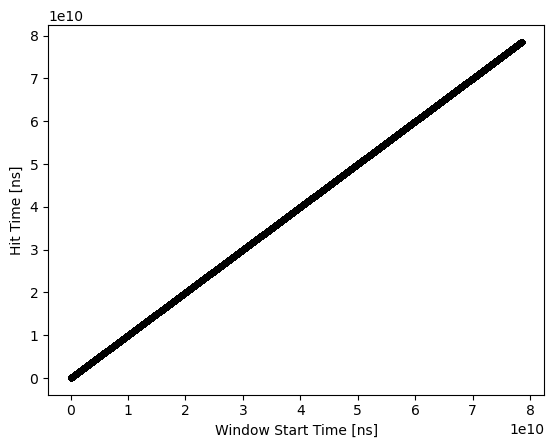

In [6]:
plt.scatter(ak.ravel(run_window_times)[::10], ak.ravel(run_times)[::10], marker=".");
plt.ylabel("Hit Time [ns]");
plt.xlabel("Window Start Time [ns]");
# plt.xlim(1.75e10, 2.15e10);
# plt.ylim(0, 0.4e11);

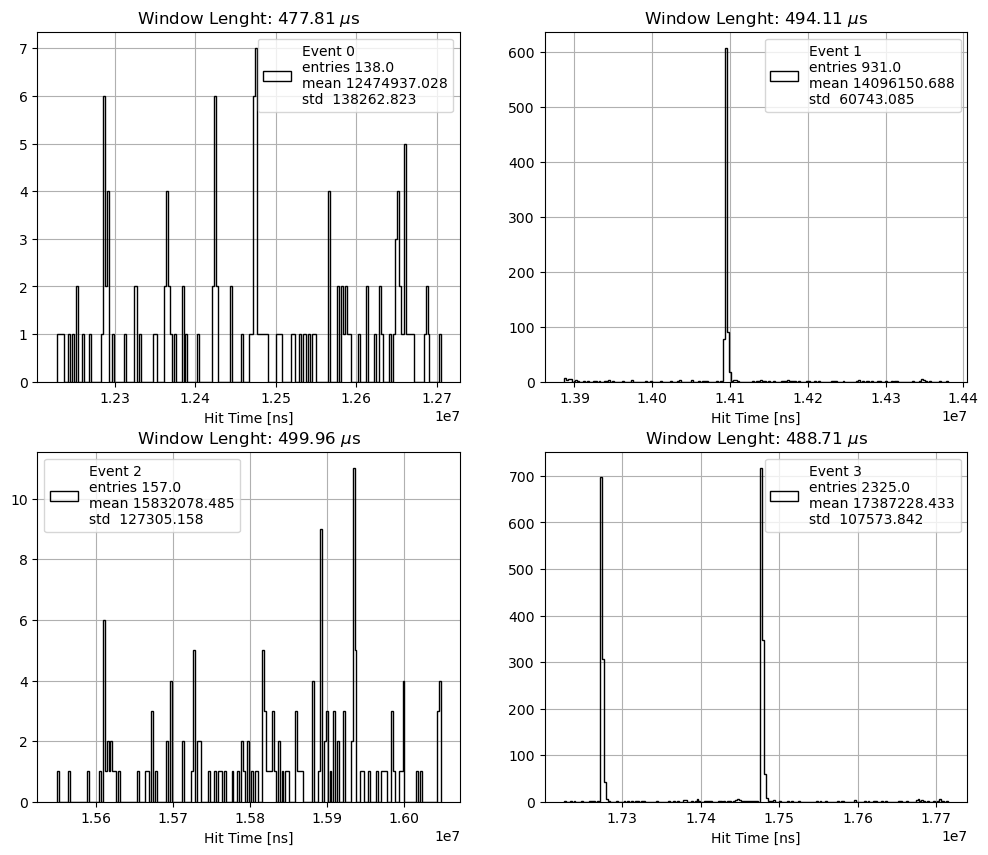

In [9]:
subplot = pltext.canvas(4)

# for i, event in enumerate(np.linspace(0, len(run_times)-1, 8).astype(int)):
for i, event in enumerate(range(4)):
    
    subplot(i+1)
    c, b, _ = pltext.hist(run_times[event], 200, xylabels="Hit Time [ns]", label=f"Event {event}");
    plt.title(f"Window Lenght: {(run_times[event][-1] - run_times[event][0])/1e3:.2f} $\mu$s");

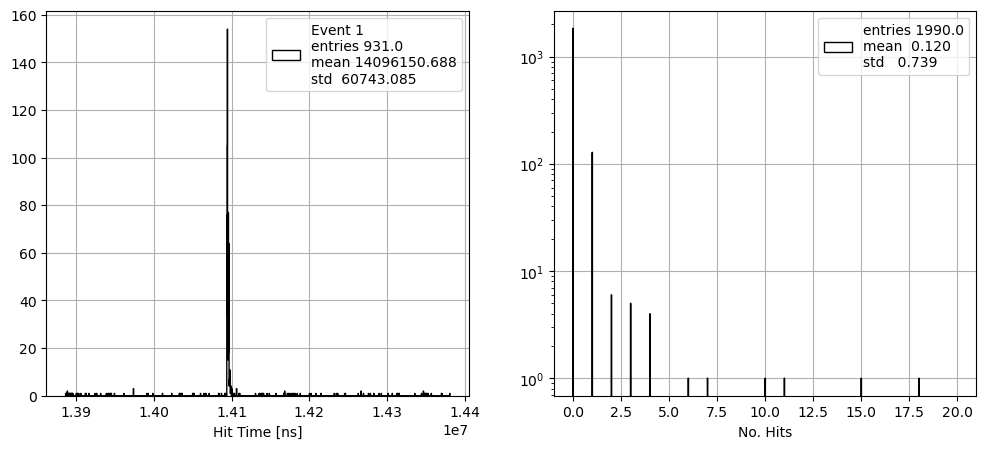

In [29]:
subplot = pltext.canvas(2)
subplot(1)
c, b, _ = pltext.hist(run_times[1], 2000, xylabels="Hit Time [ns]", label=f"Event {1}");

subplot(2)
pltext.hist(c, 1000, ylog=True, range=(0, 20), xylabels="No. Hits");

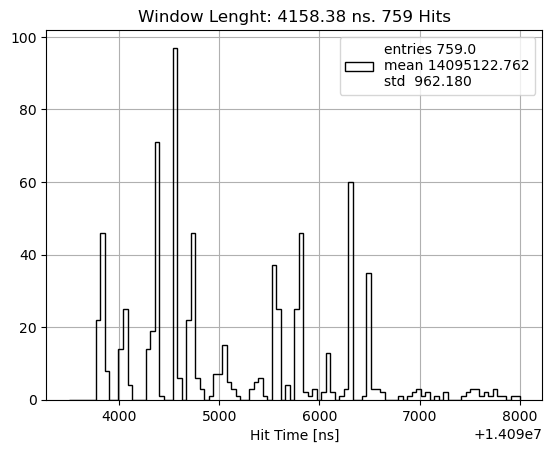

In [249]:
event = 1
data = run_times[event]
hist_range=(-6500+1.41e7, -2000+1.41e7)
indices_in_range = np.where((data >= hist_range[0]) & (data <= hist_range[1]))[0]

pltext.hist(data, 100, range=hist_range, ylog=False, xylabels="Hit Time [ns]");
plt.title(f"Window Lenght: {data[indices_in_range][-1] - data[indices_in_range][0]:.2f} ns. {len(data[indices_in_range])} Hits");

### nHits

In [ ]:
w=50
thresh_min=4
thresh_max=50
pre_window=100
post_window=250
jump= w + pre_window + post_window

triggered_hits_index = {}

ht = ak.to_numpy(run_times[event])

# Sliding window logic
ends   = ht + w
right  = np.searchsorted(ht, ends, side="left")
left   = np.arange(len(ht))
counts = right - left

# Get the indices of all the hit times that triggered the nHits algorithm
trigger_indices = np.where((counts >= thresh_min) & (counts < thresh_max))[0]
print("window: ", trigger_indices)

event_hits = []
last_trigger_time = -np.inf  # First trigger always need to exist

# Search for the rest of the hits in the trigger
for idx in trigger_indices:
    # Define actual sliding window that triggered
    i_start = idx
    i_end = right[idx]  # one past the last hit in window
    window_hits = ht[i_start:i_end]
    # print(f"Hits in Trigger Window: {len(window_hits)}")

    first_hit_time = window_hits[0]
    last_hit_time  = window_hits[-1]

    # Avoid overlap due to dead time
    if first_hit_time < last_trigger_time + jump:
        continue

    # Expand window
    t_min = first_hit_time - pre_window
    t_max = last_hit_time + post_window

    pre_indices = np.where((ht >= t_min))[0]
    post_indices = np.where((ht <= t_max))[0]
    buffer_indices = np.where((ht >= first_hit_time) & (ht <= last_hit_time))[0]
    
    tmp_only_in_post = np.setdiff1d(post_indices, buffer_indices)
    only_in_post = tmp_only_in_post[tmp_only_in_post > buffer_indices.max()]
    
    if len(only_in_post) >= thresh_min:
        continue
    
    print("pre: ", pre_indices)
    print("post: ", post_indices)
    print("buffer: ", buffer_indices)
    print("hits_from_post:", only_in_post)
    print(f"Hits in Window after Pre/Post Trigger window: {len(buffer_indices)}")
    event_hits.append(buffer_indices)
    
    last_trigger_time = first_hit_time  # or maybe last_hit_time 

# Update dictionary
if len(event_hits) > 0:
    triggered_hits_index[event] = event_hits

window:  [  1   2   3   7  25  26  30  31  32  33  34  63 123 124 128 182 183 184
 185 186 187 188 189 190 191 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 237 238 239 240 241 242 243 244 245 246 247
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333
 334 335 336 337 338 339 340 341 342 343 344 350 351 352 353 354 355 356
 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374
 375 376 377 378 379 380 381 382 383 384 385 392 393 394 395 396 397 398
 399 400 401 402 403 404 405 406 411 412 413 414 415 416 417 418 419 420
 424 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444
 445 446 447 448 449 450 451 452 453 454 4

In [ ]:
triggered_hits_index

{36608: [array([ 7,  8,  9, 10]),
  array([30, 31, 32, 33, 34, 35, 36, 37]),
  array([63, 64, 65, 66]),
  array([128, 129, 130, 131]),
  array([324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336,
         337, 338, 339, 340, 341, 342, 343, 344, 345, 346]),
  array([557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569,
         570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582,
         583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595,
         596, 597, 598, 599, 600, 601, 602, 603, 604, 605]),
  array([621, 622, 623, 624]),
  array([684, 685, 686, 687, 688, 689])]}

In [ ]:
# Suponiendo que quieres procesar el valor asociado a la clave 4862
ranges = [f"{arr.min()}:{arr.max()+1}" for arr in triggered_hits_index.get(event)]
tuple_of_slices = tuple(slice(int(r.split(':')[0]), int(r.split(':')[1])) for r in ranges)
indices = np.r_[tuple_of_slices]

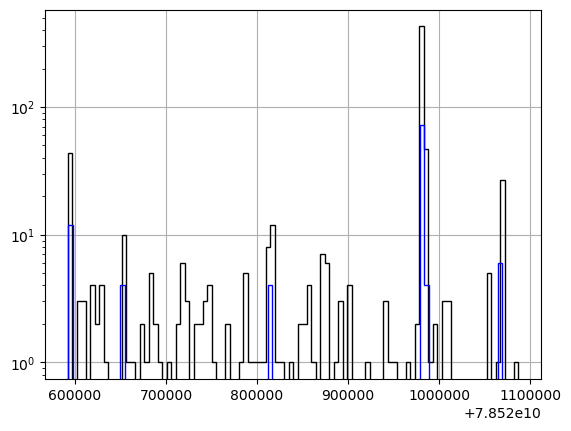

In [ ]:
data = run_times[event]
hist_range=(6.98e10+4723e3, 6.98e10+4728e3)
indices_in_range = np.where((data >= hist_range[0]) & (data <= hist_range[1]))[0]
trigger_indices_in_range = np.where((data[indices] >= hist_range[0]) & (data[indices] <= hist_range[1]))[0]

pltext.hist(data, 100, ylog=True, range=None, stats=False);
pltext.hist(data[indices], 100, range=None, stats=False);
# plt.title(f"Window Lenght: {data[indices_in_range][-1] - data[indices_in_range][0]:.2f} ns. {len(data[indices_in_range])} Hits");

### Event Display

(2014,)


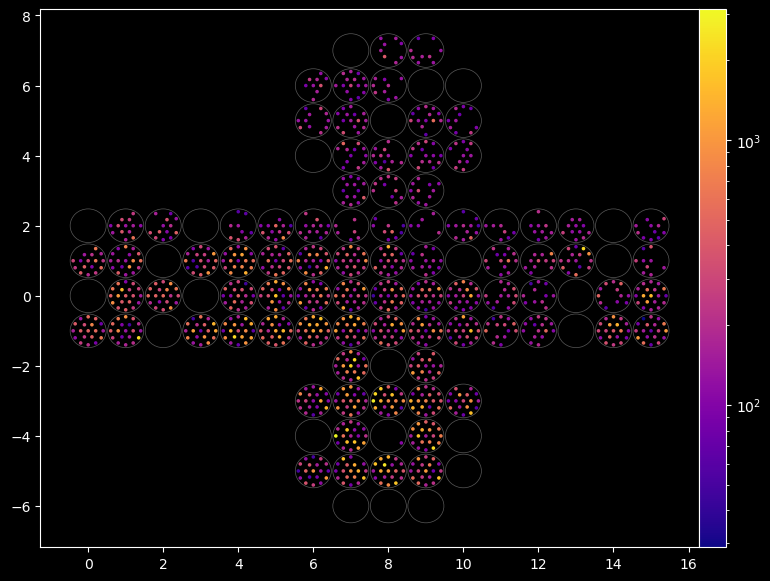

In [240]:
event = 3
pmt_id = (run_slots[event]*19 + run_positions[event])
data_to_plot = run_charges[event]#[indices]
eventDisplay = EventDisplay() 
eventDisplay.load_mPMT_positions('mPMT_2D_projection_angles.csv')

ev_disp_data = eventDisplay.process_data(pmt_id, data_to_plot, sum_data=False)
eventDisplay.plotEventDisplay(ev_disp_data, color_norm=colors.LogNorm(), style="dark_background", fig_width=10)

plt.show(block=False)
plt.style.use('default');

pltext.style()